Check mass thresh:

In [ ]:
from gal_goku_sims import xi

corr = xi.Corr()
basedir = '/scratch/06536/qezlou/Goku/FOF/HF'
pigs = corr.get_pig_dirs(basedir, z=2.5, narrow=False)

[ 000000.00 ]   0: 02-23 12:33  get corr        INFO     Logger initialized at level: 20
[ 000000.00 ]   0: 02-23 12:33  get corr        INFO     MPI_COMM_WORLD | size = 1 -- Nbkit COMM | size = 1
[ 000000.05 ]   0: 02-23 12:33  get corr        INFO     base_dir = /scratch/06536/qezlou/Goku/FOF/HF | number of sims = 21, z = 2.5


In [4]:
pigs['pig_dirs']

['/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0024/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0025/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0026/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0054/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0055/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0056/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0072/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0073/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0074/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0207/output/PIG_003',
 '/scratch/06536/qezlou/Goku/FOF/HF/compressed_10p_Box1000_Part3000_0208/output/PIG_003',
 '/scratch

In [ ]:
import os
os.mkdi

In [17]:
np.array(cat['Mass'][10:20])
print(cat['Mass'])
ind = cat['Mass'] > 1e11
new_cat = cat[ind]
print(new_cat, cat)

dask.array<mul, shape=(382736,), dtype=float32, chunksize=(100000,), chunktype=numpy.ndarray> first: 65690550000000.0 last: 81177740000.0
HaloCatalog(size=295748) HaloCatalog(size=382736)


<KeysViewHDF5 ['corr', 'mbins', 'pairs']>
<HDF5 dataset "corr": shape (231, 50), type "<f8">


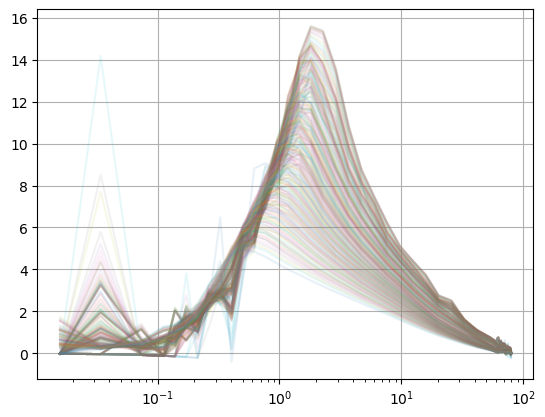

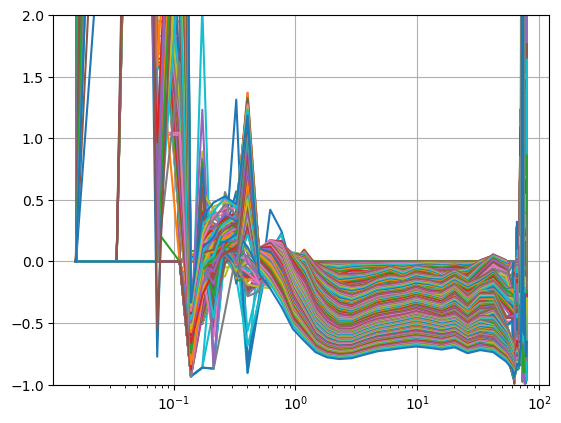

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from gal_goku import utils
with h5py.File('/scratch/06536/qezlou/Goku/processed_data/corrs_bins/compressed_10p_Box250_Part750_0228.hdf5','r') as f:
    print(f.keys())
    mbins = f['mbins'][:]
    corr = f['corr'][:]
    print(f['corr'])
    fig, ax = plt.subplots()
    figr, axr = plt.subplots()

    for i in range(corr.shape[0]):
        #ax.scatter(mbins, mbins*corr[i], s=10, marker='*')
        ax.plot(mbins, mbins*corr[i], alpha=0.1)
        fit = utils.ConstrainedSplineFitter(logging_level='INFO', degree=3, constraints=False)
        ind = mbins < 10
        knots= mbins[ind]
        #spline = fit.fit_spline(mbins[ind], corr[ind], knots= knots)

        fine_mbins = 10**np.arange(np.log10(mbins[0]), np.log10(mbins[-1])+0.02, 0.05)
        #ax.plot(fine_mbins, fine_mbins*spline(fine_mbins), color='C1')
        ax.set_xscale('log')
        #ax.set_yscale('log')
        ax.grid(True)


        axr.plot(mbins, np.abs(corr[i]/corr[0]) -1 )
        axr.set_xscale('log')
        axr.grid(True)
        axr.set_ylim((-1,2))
    

In [ ]:
mbins = np.arange(13, 10.9,-0.1 )
idx = np.triu_indices(len(mbins), k=0)
pairs = np.column_stack((mbins[idx[0]], mbins[idx[1]]))
len(pairs)

231

In [2]:
print(f'Node hours needed For L2 = {26*565/60}')

Node hours needed For L2 = 244.83333333333334


In [4]:
244/20

12.2